<a href="https://colab.research.google.com/github/bbhargavpanchal/Imagetostring/blob/main/CoordinatesWithPytesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract

In [ ]:
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,501 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120901 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import re
import numpy as np

In [ ]:
image_path = "/content/wer.png"
image = Image.open(image_path)

image_width, image_height = image.size

In [ ]:
lower_right_width = 530
lower_right_height = 160
start_x = image_width - lower_right_width
start_y = image_height - lower_right_height

# Crop
lower_right_corner = image.crop((start_x, start_y, image_width, image_height))

In [ ]:
resized_image = lower_right_corner.resize(
    (int(lower_right_corner.width * 1.5), int(lower_right_corner.height * 1.5))
)

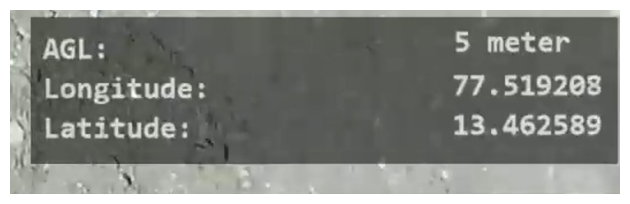

In [ ]:
plt.imshow(resized_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Convert PIL Image to numpy array
np_image = np.array(resized_image)

In [ ]:
custom_config = r'--oem 3 --psm 4'
text = pytesseract.image_to_string(np_image, config=custom_config, lang='eng')

numeric_parts = re.findall(r'\b\d+\.\d+|\b\d+\.|\.\d+|\b\d+\b', text)

# numeric_parts = re.findall(r'(\d+(?:\.\d+)?)\D*', text)   # Also Works

for number in numeric_parts:
    print(number)

5
77.519208
13.462589
